In [1]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

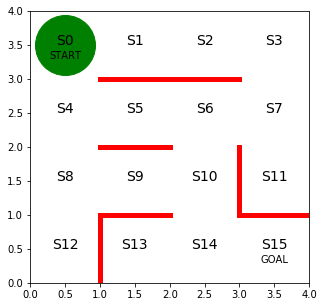

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')
plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')
plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')
plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')
plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')


# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

line, = ax.plot([0.5], [3.5], marker="o", color='g', markersize=60)

# 붉은 벽 그리기
plt.plot([1, 3], [3, 3], color='red', linewidth=5)
plt.plot([3, 3], [1, 2], color='red', linewidth=5)
plt.plot([1, 2], [2, 2], color='red', linewidth=5)
plt.plot([1, 2], [1, 1], color='red', linewidth=5)
plt.plot([3, 4], [1, 1], color='red', linewidth=5)
plt.plot([1, 1], [0, 1], color='red', linewidth=5)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~15, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, 1, np.nan, 1],  # s2
                    [np.nan, np.nan, 1, 1],  # s3
                    [1,  1,   1,   np.nan],  # s4
                    [np.nan, 1, np.nan, 1],  # s5
                    [np.nan, 1, 1, 1     ],  # s6
                    [1, np.nan, 1 , 1    ],  # s7
                    [1, 1, 1, np.nan     ],  # s8
                    [np.nan, 1, np.nan, 1],  # s9
                    [1, np.nan, 1, 1     ],  # s10
                    [1, np.nan, np.nan, np.nan],  # s11
                    [1, np.nan, np.nan, np.nan],  # s12
                    [np.nan, 1, np.nan, np.nan],  # s13
                    [1, 1, np.nan, 1],  # s14,               
                                        # s15는 목표지점이므로 정책이 없다
                    ])

In [4]:
# 정책 파라미터 theta를 행동정책 pi로 변환하는 함수


def simple_convert_into_pi_from_theta(theta):
    '''단순히 값의 비율을 계산'''

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [5]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수


def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [6]:
# 초기 정책 pi_0을 계산
#pi_simple = simple_convert_into_pi_from_theta(theta_0)
#print(pi_simple)

pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.33333333]]


In [7]:
# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 4  # 위로 이동하면 상태값이 4 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 4  # 아래로 이동하면 상태값이 4 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [8]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다


def goal_maze_ret_s_a(pi):
    s = 0  # 시작 지점
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다.

        if next_s == 15:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [9]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 2], [4, 1], [5, 1], [6, 2], [10, 0], [6, 3], [5, 1], [6, 3], [5, 1], [6, 3], [5, 1], [6, 3], [5, 1], [6, 2], [10, 3], [9, 1], [10, 2], [14, 3], [13, 1], [14, 0], [10, 2], [14, 0], [10, 0], [6, 2], [10, 3], [9, 1], [10, 3], [9, 1], [10, 0], [6, 2], [10, 0], [6, 2], [10, 2], [14, 3], [13, 1], [14, 0], [10, 0], [6, 2], [10, 3], [9, 3], [8, 2], [12, 0], [8, 1], [9, 3], [8, 1], [9, 3], [8, 2], [12, 0], [8, 1], [9, 3], [8, 2], [12, 0], [8, 2], [12, 0], [8, 2], [12, 0], [8, 0], [4, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [4, 2], [8, 2], [12, 0], [8, 0], [4, 1], [5, 3], [4, 1], [5, 1], [6, 1], [7, 2], [11, 0], [7, 2], [11, 0], [7, 2], [11, 0], [7, 3], [6, 3], [5, 3], [4, 1], [5, 3], [4, 1], [5, 1], [6, 3], [5, 3], [4, 1], [5, 1], [6, 2], [10, 3], [9, 3], [8, 2], [12, 0], [8, 0], [4, 1], [5, 3], [4, 1], [5, 3], [4, 2], [8, 0], [4, 2], [8, 2], [12, 0], [8, 2], [12, 0], [8, 1], [9, 3], [8, 1], [9, 3], [8, 1], [9, 1], [10, 2], [14, 1], [15, nan]]
목표 지점에 이르기까지 걸린 단계 수는 114단계입니다


In [10]:
# theta를 개선하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                # 초판에서 부호 오류가 있었음(수정일 : 1807030
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [11]:
# 정책 수정
#new_theta = update_theta(theta_0, pi_0, s_a_history)
#pi = softmax_convert_into_pi_from_theta(new_theta)
#print(pi)

In [13]:
# 정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-3  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi)  # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history)  # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 정책 π를 수정

    print(np.sum(np.abs(new_pi - pi)))  # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.013228812344478647
목표 지점에 이르기까지 걸린 단계 수는 84단계입니다
0.01805900031894675
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.02840540119472007
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.011360914614453876
목표 지점에 이르기까지 걸린 단계 수는 144단계입니다
0.021629440450227688
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.011694439366325748
목표 지점에 이르기까지 걸린 단계 수는 72단계입니다
0.01916677313297982
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.010733772362993665
목표 지점에 이르기까지 걸린 단계 수는 56단계입니다
0.012465346020816948
목표 지점에 이르기까지 걸린 단계 수는 156단계입니다
0.03120570220719593
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.0216832868140322
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.013314732378061134
목표 지점에 이르기까지 걸린 단계 수는 60단계입니다
0.01728086301283932
목표 지점에 이르기까지 걸린 단계 수는 48단계입니다
0.021501558548365107
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다
0.0306915404704719
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.02599493752320836
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.016929385688631615
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.014453658672838154
목표 지점에 이르기까지 걸린 단계 수는 88단계입니다
0.007734510528043248
목표 지점에 이르기까지 걸린 단계 수는 150단계입니다
0.03316242216156301
목표 지점에 이르기까지 걸린 단계

0.0135481623496721
목표 지점에 이르기까지 걸린 단계 수는 66단계입니다
0.012570581516566703
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.023104817556356516
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.012543582213789428
목표 지점에 이르기까지 걸린 단계 수는 88단계입니다
0.016827054558806842
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.01608126007307431
목표 지점에 이르기까지 걸린 단계 수는 74단계입니다
0.010354321235313824
목표 지점에 이르기까지 걸린 단계 수는 120단계입니다
0.01316554126172037
목표 지점에 이르기까지 걸린 단계 수는 82단계입니다
0.030545570050461712
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01575246106179118
목표 지점에 이르기까지 걸린 단계 수는 60단계입니다
0.015079396344593265
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.014063996119142386
목표 지점에 이르기까지 걸린 단계 수는 124단계입니다
0.014734261631927537
목표 지점에 이르기까지 걸린 단계 수는 76단계입니다
0.022317562538037128
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.019770156876035894
목표 지점에 이르기까지 걸린 단계 수는 36단계입니다
0.027260950517214166
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.02053525646968607
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.013107735629655948
목표 지점에 이르기까지 걸린 단계 수는 50단계입니다
0.01876271865193585
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.0158835162653731
목표 지점에 이르기까지 걸린 단

0.025310493308634163
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.010197304788230832
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.013273068678936129
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다
0.0248785522980558
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.01796771343075787
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.022640946323707167
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.016562451162722536
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.02325323288654041
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.017353429619569594
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.027997760595800947
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.028232410678745268
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.02005980932323348
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.010775038846963791
목표 지점에 이르기까지 걸린 단계 수는 46단계입니다
0.03387271841956663
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.019316418777435534
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.014365528595376348
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.012343975557509629
목표 지점에 이르기까지 걸린 단계 수는 68단계입니다
0.00905473484887373
목표 지점에 이르기까지 걸린 단계 수는 66단계입니다
0.02323575240477549
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.020529078941738776
목표 지점에 이르기까지 걸린 단계 

0.02764183459146949
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.023174975045636675
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.011848200788060703
목표 지점에 이르기까지 걸린 단계 수는 84단계입니다
0.017030869177662472
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.0180054471551572
목표 지점에 이르기까지 걸린 단계 수는 42단계입니다
0.02021496626574351
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.03551821329242849
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.02742515145886862
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.01660572158275994
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.01832681339870479
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.024245691556000593
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.016168210123654325
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.016516690942841722
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.019945711628654328
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.032752891274090645
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017265931279085073
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.02045105060351049
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.03316138497618007
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.021213694310612208
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.01894060224634006
목표 지점에 이르기까지 걸린 단계 수는 1

0.023502635912950237
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.021416280376138463
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.02883819529835313
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.017990425101609975
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.01750187591111102
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.019758410908654905
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.01874737682373176
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.0207778819361549
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.027236347326043964
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016628690226627135
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.02826371448625653
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.024859904191779664
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.02314223279593164
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.020872220963299992
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.027000129223402336
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.02899228291975514
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.022476977310264823
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.012488133618384106
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.02283244800150319
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.021757697990119673
목표 지점에 이르기까지 걸린 단계 수는 18

0.02001386956493595
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.017116440171047492
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.019475320259906587
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.019986801847884067
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01926877381028108
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0214879624914448
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.021972893733340326
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01918167825766412
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.027444020535485447
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.017634570067695754
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.020747091118401645
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.02730567049316926
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018922574270495235
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015923405631010634
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.019526967764886743
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.027299153586644198
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.019625421133168758
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018651556016302057
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.018105133171482712
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.01984743421395621
목표 지점에 이르기까지 걸린 단계 수는 16단계입니

0.01894542240714947
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.0241091991548026
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016034494614923706
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.01891831506698778
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.019547627929555417
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017557802048966953
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.015085636982261924
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01783628168903864
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.020149706476613904
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015473394808546231
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015612598794947252
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.01578961461624552
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.02243278887680826
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.018553063445340218
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.023416922521491176
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.018521818200717605
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017886267325752672
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.017416184836182513
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017360331775124
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014903710335717107
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다


0.01343873975634563
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.011403288873058373
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014482973903842178
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.027594796925207013
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011518215482740027
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0157288884976219
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.010634733093172935
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010158424552606626
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015816111321308626
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.014615749883804596
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01601781426551077
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.011504310048695995
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01647090140192642
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.012182938392558226
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.014879851806523903
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010169320115135522
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013333477270812966
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.011326495728787023
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01556598937709977
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.016083329626711815
목표 지점에 이르기까지 걸린 단계 수는 1

0.01211060879652233
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.008435087339105633
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009230672019413216
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01720220604594489
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0146289561431351
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.012745576592660422
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.009207286214255907
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.020514214004187
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008540391927294305
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.019212549117801153
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008549871451373814
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012988313078525576
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00844252613998333
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008377693645389934
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01650796734560047
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.019019540615846528
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012953565243140765
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010003787000433174
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015772909301026296
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.015471054338482712
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0

0.012580031667617501
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007739014890257585
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012429391693013027
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016592612292715588
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008950739726910392
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01607265062155193
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007801495071129844
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009210709487387364
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007715812999928719
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009537756337821938
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011672285864900572
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.007628268185858732
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007567968600192133
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015225044666947123
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012427204325677614
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010345805544901332
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.018624444797615818
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016475318019526577
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01562420148679211
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.009913774563329085
목표 지점에 이르기까지 걸린 단계 수는 12단

0.0068701261404407465
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0042965946591861995
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012043015076256186
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01374656574399949
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.006902710735813701
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015259590485036403
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008592328252203005
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006906577625991325
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013289584951216543
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.006894262439834056
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0068407039875579626
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013441479697288497
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01174818889541003
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.006886134434937588
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013217034283344378
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.006821448865426509
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016081341714805075
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007578595810040008
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0068417242252564875
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014153191658679891
목표 지점에 이르기까지 걸린 단계 수는 

0.020018566926474697
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.0068258328643375984
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013056207162703518
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01373358726312255
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.006841587486535718
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006787216928163899
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010970234922562466
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012245901140966624
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007807696461049819
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00678352643777725
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006729770557005715
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00667654128201646
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012242400410763382
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007966305650438467
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00665945441255416
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003944718579479305
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014146149260251366
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.015302348052221838
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006742965590856152
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011638938121630374
목표 지점에 이르기까지 걸린 단계 수는 8단계입니

0.006977591739462934
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005680804054130802
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014927263578591088
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0057212293526717195
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00842613956521411
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012473805152265913
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005742846293446423
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0069193520286170845
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015876728626204095
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.01611353384720659
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.00743829971516774
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005745243667151088
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010009786775178178
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015095538480949196
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003619505873314312
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00580418053901121
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005759766087826496
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007652268155184425
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005696234742932738
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005652975565649886
목표 지점에 이르기까지 걸린 단계 수는 6단계입니

목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005601593495185138
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007108580975042959
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0055300441483729715
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0028308971058377125
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005476023730837262
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014354750086687025
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014341259635268437
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0056152138959408016
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006619810000213833
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0055420292319259615
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0054962171500933035
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009930086278380303
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0054213390856021546
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005376823367205678
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009585356625350684
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01282763251419413
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.005359098814867104
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00531534685965749
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005272058756295654
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00522923057850

0.0050720560165139275
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005029645314058126
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011401384227354525
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.006003600711824528
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013578496607825792
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005110235068742433
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005067364521300702
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013551045574589492
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013547251008738506
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013540746099088632
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005304482534089827
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0052592848528516395
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0052145659325702615
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005170322444850682
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0051265509596972875
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005083247953326424
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013468331975044753
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011074193691809613
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.013503357968678326
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005283602548251859
목표 지점에 이르기까지 걸린 단계 수는 6

0.005096673391134378
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00999645452357463
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005108729799667925
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005065145866177841
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005022034907694754
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01289213150796125
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01460866406634903
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009537248409410948
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.022934027429012058
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.00601201360034543
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012898374962861343
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012898826651513505
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01289645430152686
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005357908702911342
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002363773112388584
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012872875864295419
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018439029729220825
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.005470826928715047
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012949695344098781
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005519200443462213
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0

0.011209998678944608
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.010776099389152485
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009184089417485698
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011392545878509089
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013893005098753582
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006141727267211697
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006593793374189139
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010392471265353677
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006016664453369857
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005962165213153736
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005908184426641028
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012464191316889951
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006684868307842765
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005918344650604403
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0058647650509685845
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008752151376320419
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010609068035780555
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0029325661312397527
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005778472368615159
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005726404027303306
목표 지점에 이르기까지 걸린 단계 수는 6단계

0.005241468711314021
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0051938888489388435
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014539841610132293
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.005900471283870126
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005215989277532404
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010995399643319765
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008418340370213686
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013197169004546268
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005370689360749678
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01934430842335321
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.009808224032399383
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.005489908434034834
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006081166500281062
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005407537583359309
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005358245719975677
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008424316716461103
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011246301241522122
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005432160329682745
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012071547735170152
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013274041782446157
목표 지점에 이르기까지 걸린 단계 수는 8단계입

0.004749741543384731
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011432940690657794
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011443791585025932
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004900241512274528
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005773886883044255
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004829176697287153
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004785684710048248
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004742671692482624
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011414558353274904
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004796459727384399
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004753273721953416
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.024322977149177832
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009044642659238347
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004685249206905228
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00562004860331591
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008970791482377446
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004592447393699815
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004551657896374843
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004511326130514557
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0044714481182484105
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다


0.003080809624220932
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011545311291726278
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.003116356037547032
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0038921625039563777
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0030769523702543766
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030529569881319225
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030292335478970707
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003005778532318395
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01053393174979695
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01059704542434134
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010657714154563885
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0032223740599254327
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003196552116081306
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0031710263806916626
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003145793069571058
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003120848437353649
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030961887777943183
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030718104240389163
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030477097488394757
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030238831647309075
목표 지점에 이르기까지 걸린 단계 수는

0.0030209577089019522
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002996250832504318
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010494823023016263
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003053575768538614
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030284484607327328
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003003613966166767
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0029790684962557844
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0029548083023888116
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002930829676192813
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010432914218482522
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0036022931755833737
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006964387213824287
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.002953911465204375
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01044213863334889
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003011059537398244
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013024847217168175
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0030372990072784906
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0030123449219261085
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0038521083585139546
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0029730791308064976
목표 지점에 이르기까지 걸린 단계 

0.0017246214683834422
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.002808162045914154
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002785346895754135
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002762796658005537
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002740507835609158
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005326348526036903
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0026902957623126562
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002668880722805682
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002647711932014716
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002626786119677163
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0026061000564124373
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00258565055354789
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0025654344629163148
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002545448676635524
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0025256901268725686
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0025061557855924725
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024868426642858273
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024677478136944687
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002448868323510437
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024302013220760116
목표 지점에 이르기까지 걸린 단계 수는

0.002800298053541487
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002776939504417042
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00275385629389676
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0027310447621794604
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0027085012924430198
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002686222310842472
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007172703177613558
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0026502522248323217
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009978409311413413
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002707391521275502
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002685117846715549
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0026631051138307146
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009986280689965984
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010719153030660598
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010116188447981869
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010182196047305185
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00294562916838155
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006936134858956233
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010211713898582352
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006977295413266128
목표 지점에 이르기까지 걸린 단계 수는 8단계입니

0.009886189408261546
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0026019014263786513
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002580902928954479
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009901554334793207
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002637352191583578
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0026159128540404197
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002594722778254066
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0025737786322255866
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0025530771257891056
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00253261501042807
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002512389079072863
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024923961658742805
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002472633145967313
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00936464857018448
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0024996212310520217
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024797732391867375
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024601532241743697
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00244075812653783
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0024215849270886464
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002402630646633208
목표 지점에 이르기까지 걸린 단계 수는 

0.005916385470500076
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0019540213232331054
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009225656493839914
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020037600627013097
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005926352269208648
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005912204433386831
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.001970931436616072
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020537505702170906
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.001968100918831933
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019540706824348626
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001940191021242297
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019264599498728767
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009177096028421707
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009266808919333467
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010161248768473352
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.002032676326903361
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002017905762895563
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020032957465316945
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019888441478961485
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019745488676223
목표 지점에 이르기까지 걸린 단계 수는 6

0.0018119877208531091
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002385125465444015
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.001791360283179777
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017788295528560465
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017664308233109553
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008886899620869063
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018141437788643869
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018092036316457536
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.0047881406375242345
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0017964682043205664
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009874025827951665
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.001829289236491248
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00899288211994472
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018780545433191194
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005952457947225173
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0018558197485956263
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009029620949513319
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003912097992226183
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009259731341054638
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0019345551500695394
목표 지점에 이르기까지 걸린 단계 

0.0019983705933458423
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019833275828927584
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019684509190702193
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009124515745399901
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020199688870159594
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020046672555044266
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019895355036875003
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001974571355725107
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009129826153436242
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002026218051315521
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002010827997947759
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001995609079030486
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001980559000275276
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019656755002176417
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009850681807930708
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008795716326784376
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0020395191654165937
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020239540697658924
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020085625568433563
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009338106166638029
목표 지점에 이르기까지 걸린 단계 

0.0023298073138918463
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0022654785797122257
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.002319890265496687
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0023008620658868852
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00947972765110859
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0023569802874488007
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0023375027362986887
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002318252766474828
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006524569562255805
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011547786907432599
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.002343787528015954
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002324476935011425
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0023053916479044614
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006688112162719627
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004468644404310463
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009489660569501356
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0023792821827623017
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0023595671453949963
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009560139318473077
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00963260881281275
목표 지점에 이르기까지 걸린 단계 수는 

0.004537841937087662
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0017051043898976166
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001693000093944387
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001681024262165834
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0016691752098521011
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001657451276965696
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0016458508277861043
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0016343722505437856
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0016230139570751548
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0016117743824651757
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0025052555530554067
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0015943669746463444
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0015834411921020804
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008458175239157048
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008556774668855242
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003505874192223875
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008624277928537151
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0087208254805067
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001905522149434213
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0018044888779107284
목표 지점에 이르기까지 걸린 단계 수

0.003730151631284635
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008787850735068605
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018566656520234773
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008861318667138587
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009511921282073302
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.001956621813809971
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001941768336589782
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001927079990690847
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019125545541114012
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018981898370746403
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00188398368160601
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00186993396110708
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018560385799418922
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001842295473009483
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001828702605338085
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001815257971663967
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018019595960254448
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001788805531356968
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017757938590773
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017629226887004926
목표 지점에 이르기까지 걸린 단계 수는 6단계입니

0.0019446350458994944
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019297253099974272
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019149820849810439
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019004031250609912
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001885986217046316
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018717291799161331
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001857629864389197
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001843686152507823
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018298959572070287
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018162572219007026
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001802767920059841
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017894260548037173
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001776229658482389
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008752033946370407
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018260874592032628
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018124755386409973
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017990127424198886
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017856970778690213
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017725265814975341
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017594993185875516
목표 지점에 이르기까지 걸린

0.0018404099844075133
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002495900307578994
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0018180584020772734
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0026569821029059654
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0017963959369063434
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017830204152794304
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017697912720503403
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017567065506089302
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001743764323101334
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008625233750803995
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017934077990837544
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017800509780129363
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017668403300742392
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017537739014013825
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017408497668498484
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017280660295945736
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0018464190616871382
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0017264675574633192
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017138449638501724
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017013586925420116
목표 지점에 이르기까지

0.0027729700650804337
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0020500237298727506
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020337482623631123
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009092424496918342
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007797483643646113
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0021217894830308937
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0021046855669338126
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0016850671111397104
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0020979363128964083
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020811162045738553
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020644887796707964
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020480514190278735
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020318015405634236
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0020157365988529834
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001999854084711525
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019841515247596662
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017606556419773444
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009447947271989377
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009120891824831442
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0021009139307214854
목표 지점에 이르기까지

0.0013854335519442491
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013763546936549995
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013673660902871181
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013584666118611095
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001349655144698543
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013409305911696295
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013322918694425104
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013237379132425234
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008251811179377887
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0013461986678169717
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013374993257722883
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013288855293330636
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002104264213773426
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0013158512088104375
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013074628141712726
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005265852010098522
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0019645816975279607
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0012890318453499493
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001280920776720448
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001272887913140102
목표 지점에 이르기까지 걸린

0.005244757028121258
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0012603766909563066
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012524905484389958
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012446800334114886
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012369442241897208
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012292822121819109
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012216931016843964
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0077245941888207485
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012609724247057783
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001253067990795288
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012452394452806964
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012374858625876731
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00122980633029798
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012221999489428741
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012146658318021152
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0012072031047078852
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0011998109058463588
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0011924883855700015
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0011852347062059898
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00763856891878123
목표 지점에 이르기까지 걸린

0.00802331824795316
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014351951984052994
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014253950856265244
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00818936988888489
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.001448787594145521
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014388406884256084
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014289957896486474
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014192515920677558
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014096068090217687
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001400060172636542
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013906104335395676
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013812563605705049
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00802083181582439
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014247702693455933
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002588518083711241
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.008094608602277417
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014657549291985702
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014556316656073962
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014456126839029661
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014356966448682545
목표 지점에 이르기까지 걸린 단계

In [18]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=2, suppress=True)  # 유효자리수 2、지수표시는 하지 않음
print(pi)


[[0.   0.01 0.99 0.  ]
 [0.   0.33 0.   0.67]
 [0.   0.51 0.   0.49]
 [0.   0.   0.63 0.37]
 [0.02 0.87 0.11 0.  ]
 [0.   0.98 0.   0.02]
 [0.   0.01 0.97 0.01]
 [0.18 0.   0.21 0.61]
 [0.07 0.88 0.05 0.  ]
 [0.   0.95 0.   0.05]
 [0.02 0.   0.97 0.02]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.01 0.98 0.   0.01]]


In [17]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 4) + 0.5  # 상태의 x좌표 : 4으로 나눈 나머지 + 0.5
    y = 3.5 - int(state / 4)  # y좌표 : 2.5에서 4으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)

print(s_a_history)

# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

[[0, 2], [4, 1], [5, 1], [6, 2], [10, 2], [14, 1], [15, nan]]
